# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [51]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
t_index = pd.date_range('2017-01-01',periods=15,freq='M')
start=5
phi=.7
noise=np.random.normal(0,2,size=len(t_index))
data=pd.DataFrame()
for month,error in zip(t_index,noise):
    if month == t_index[0]:
#         print(month)
        data=pd.Series(start+error)
#         print(data)
    else:
        data=pd.concat([data,pd.Series(start+phi*(data.iloc[-1]-start)+error)],axis=0)
        

In [53]:
data

0    7.408794
0    4.370869
0    5.800932
0    1.617670
0    5.659702
0    5.126748
0    6.617681
0    2.308858
0    2.968274
0    8.923729
0    6.088776
0    5.346737
0    5.774296
0    7.683886
0    7.855630
dtype: float64

In [57]:
t_index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31'],
              dtype='datetime64[ns]', freq='M')

In [60]:
dt_data = pd.DataFrame(data).set_index(t_index)

Plot the time series and verify what you see

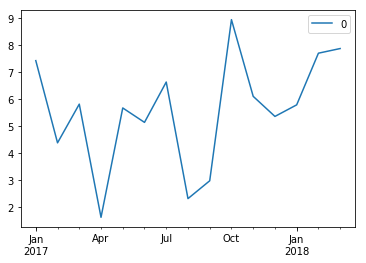

In [62]:
dt_data.plot();

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


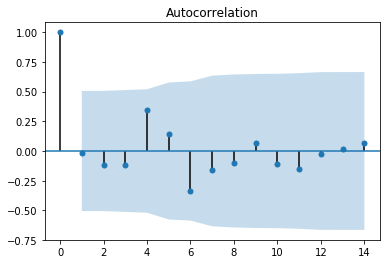

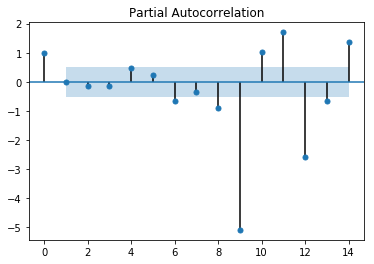

In [65]:
plot_acf(dt_data);
plot_pacf(dt_data);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [67]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   15
Model:                     ARMA(1, 0)   Log Likelihood                 -31.741
Method:                       css-mle   S.D. of innovations              2.008
Date:                Sun, 07 Apr 2019   AIC                             69.482
Time:                        20:58:55   BIC                             71.606
Sample:                             0   HQIC                            69.459
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5649      0.514     10.821      0.000       4.557       6.573
ar.L1.y       -0.0195      0.271     -0.072      0.944      -0.551       0.512
                                    Roots           

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [75]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates

t_index = pd.date_range('2015-04-01',periods=5,freq='M')
start=7
phi=.9
noise=pd.Series(np.random.normal(0,4,size=len(t_index)))
data=pd.DataFrame()
for month,error in zip(t_index,noise):
    if month == t_index[0]:
        data=pd.Series(start+error)
    else:
        data=pd.concat([data,pd.Series(start+phi*(noise[noise[noise==error].index-1])+error)],axis=0)
        

In [77]:
dt_data = pd.DataFrame(data).set_index(t_index)
dt_data.head()

,0
2015-04-30,8.885741
2015-05-31,3.933264
2015-06-30,8.443315
2015-07-31,10.907138
2015-08-31,2.992098


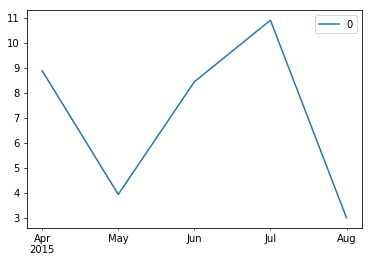

In [79]:
dt_data.plot();

## Look at the ACF and PACF of your model and write down your conclusions

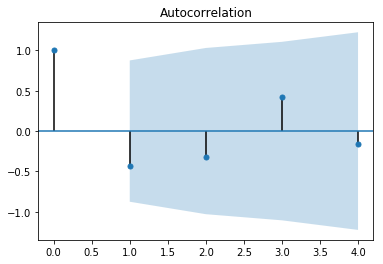

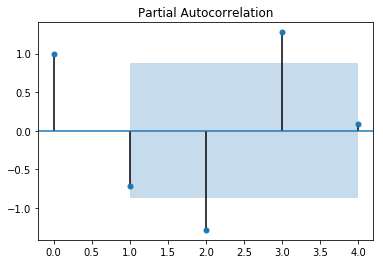

In [81]:
plot_acf(dt_data);
plot_pacf(dt_data,method='ols');

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [82]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                    5
Model:                     ARMA(0, 1)   Log Likelihood                 -10.986
Method:                       css-mle   S.D. of innovations              1.820
Date:                Sun, 07 Apr 2019   AIC                             27.971
Time:                        21:07:34   BIC                             26.800
Sample:                             0   HQIC                            24.827
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2601      0.435     16.684      0.000       6.407       8.113
ma.L1.y       -1.0000      0.502     -1.990      0.141      -1.985      -0.015
                                    Roots           

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [87]:
# the data is in "winning_400m.csv"
oly_data = pd.read_csv('winning_400m.csv')
oly_data.set_index('year',inplace=True)
oly_data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot the data

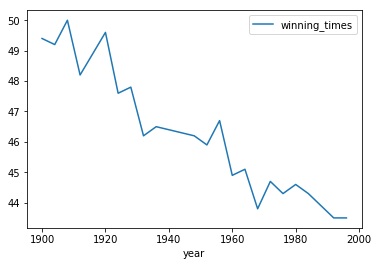

In [89]:
oly_data.plot();

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [91]:
oly_diff = oly_data.diff(periods=1)
oly_diff.dropna(inplace=True)

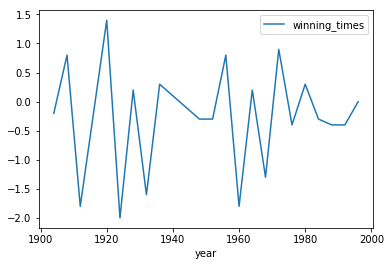

In [92]:
oly_diff.plot()

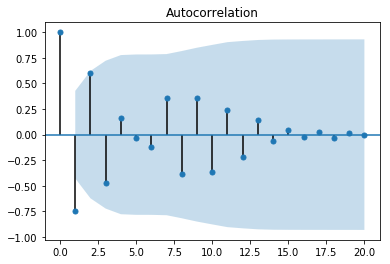

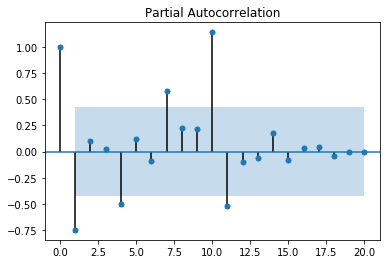

In [94]:
plot_acf(oly_diff)
plot_pacf(oly_diff,method='ols');

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [96]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(oly_diff, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Sun, 07 Apr 2019   AIC                             47.916
Time:                        21:11:20   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [97]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(oly_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 07 Apr 2019   AIC                             46.107
Time:                        21:12:12   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.